# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Exercise 1

#### 1.1 Dirac function
Considering the Dirac function corresponding to the equation below, write a <tt>dirac</tt> function to define a discrete signal of length $N$ and containing the Dirac function at the position $n$, as $\delta(k-n)$. Verify inside the function that $n \in [0,N-1]$ and raise an error if it is not the case.

$\delta(k) = \left\{
    \begin{array}{lll}
        1 & \mbox{if}  & k=0 \\
        0 &  &\mbox{elsewhere}
    \end{array} \right .$
    
By default $n$ and $N$ should be equal to 0 and 20, respectively. Plot the signal for $n=10$ using the function <tt>stem</tt> and add labels and title.

In [2]:
def dirac(n=0, N=20):
    if n > N-1:
        raise ValueError('n should be in 0 to N-1')
    s = np.zeros((N, ))
    s[n] = 1
    return s

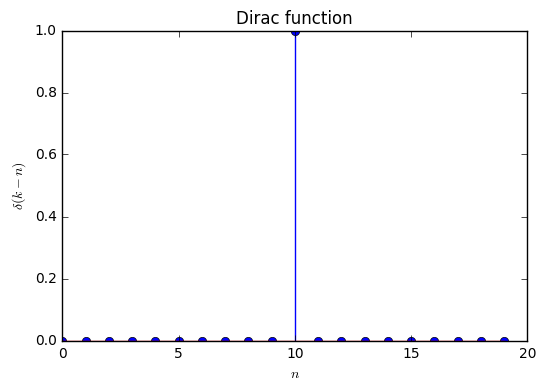

In [3]:
plt.stem(dirac(10))
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta(k-n)$')
plt.title('Dirac function')

#### 1.2 Step function
Considering the step function $H$ corresponding to the equation below, write a function <tt>step</tt> to define a discrete signal of length $N$ and containing the value of the step function shifted at the position $n$, as $H(k-n)$. Verify inside the function that $n \in [0,N-1]$ and raise an error if it is not the case.

$H(k) = \left\{
    \begin{array}{lll}
        1 & \mbox{if}  & k\geq 0 \\
        0 & & \mbox{elsewhere}
    \end{array} \right .$
    
By default $n$ and $N$ should be equal to 0 and 20, respectively. Plot the signal for $n=10$ using the function <tt>stem</tt> and add labels and title.

In [4]:
def step(n=0, N=20):
    if n > N-1:
        raise ValueError('n should be in 0 to N-1')
    s = np.zeros((N,))
    s[n:N] = 1
    return s

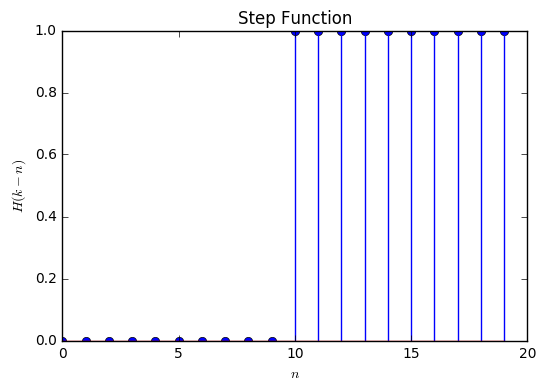

In [5]:
plt.stem(step(10))
plt.xlabel(r'$n$')
plt.ylabel(r'$H(k-n)$')
plt.title('Step Function')

#### 1.3 Ramp function
Considering the ramp function $P(k)$ corresponding to the equation below, write a function <tt>ramp</tt> to define a discrete signal of length $N$ and containing the values of the ramp function shifted at the position $n$ with a slope $a$, as $a.P(k-n)$. Verify inside the function that $n \in [0,N-1]$ or that $a \neq 0$ and raise an error if it is not the case.

$P(k) = \left\{
    \begin{array}{lll}
        k & \mbox{if}  & k\geq 0 \\
        0 & & \mbox{elsewhere}
    \end{array} \right.$
    
By default $a$, $n$, and $N$ should be equal to $1$, $0$, and $20$, respectively. Plot the signal for $a=2$ and $n=10$ using the function <tt>stem</tt> and add labels and title.

In [6]:
def ramp(a=1, n=0, N=20):
    if n > N-1 or a==0:
        raise ValueError('n should be in 0 to N-1 or a should not be equal to zero')
    s = np.zeros((N,))
    s[n:N] = a*np.linspace(0,N-n,num = N-n)
    return s

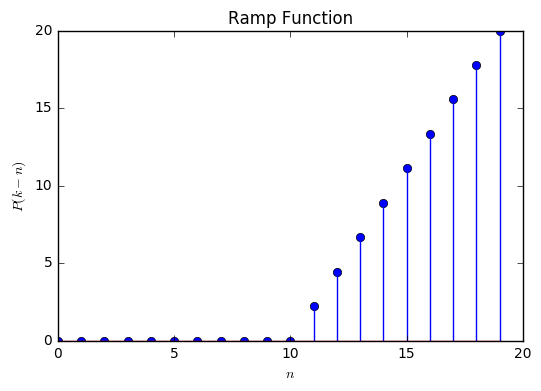

In [7]:
plt.stem(ramp(2,10))
plt.xlabel(r'$n$')
plt.ylabel(r'$P(k-n)$')
plt.title('Ramp Function')

#### 1.4 Geometric function
Considering the geometric function $G(k)$ corresponding to the equation below, write a function <tt>geo</tt> to define a discrete signal of length $N$ and containing the values of the geometric function shifted at the position $n$, as $G(k-n)$. Verify inside the function that $n \in [0,N-1]$ and raise an error if it is not the case.

$G(k) = \left\{
    \begin{array}{lll}
        a^k & \mbox{if}  & k\geq 0 \\
        0 & & \mbox{elsewhere}
    \end{array} \right. $
    
By default $a$, $n$, and $N$ should be equal to $2$, $0$, and $20$, respectively. Plot the signal for $a=2$ and $n=10$ using the function <tt>stem</tt> and add labels and title.

In [8]:
def geo(a=2, n=0, N=20):
    if n > N-1:
        raise ValueError('n should be in 0 to N-1')
    s = np.zeros((N,))
    s[n:N] = np.power(a,np.linspace(0,N-n,num = N-n))
    return s
    

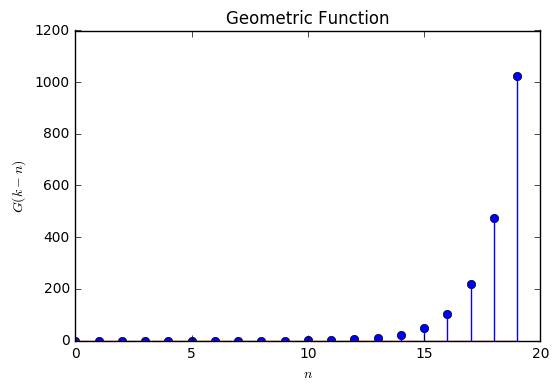

In [9]:
plt.stem(geo(2,10))
plt.xlabel(r'$n$')
plt.ylabel(r'$G(k-n)$')
plt.title('Geometric Function')

#### 1.5 Box function 
Considering the box function $B_a(k)$ corresponding to the equation below, write a function <tt>box</tt> to define a discrete signal of length $N$ and containing the values of the <tt>box</tt> function shifted at the position $n$ with a half-width $a$, as $B_a(k-n)$. Verify inside the function that $n \in [a,N-a]$ and $a > 0$. If not, raise an error if it is not the case.

$B_a(k) = \left\{
    \begin{array}{lll}
        1 & \mbox{if}  & -a \leq k \leq a \\
        0 & & \mbox{elsewhere}
    \end{array} \right.  $
    
By default $a$, $n$, and $N$ should be equal to $1$, $10$, and $20$, respectively. Plot the signal for $a=3$ and $n=10$ using the function <tt>stem</tt> and add labels and title.

In [10]:
def box(a=1, n=10,N=20):
    if n < a or n > N-a or a <= 0:
        raise ValueError('n is not in range of a and N-a or a is less than or equal to zero')
    s = np.zeros(N)
    s[n-a:n+a+1] = 1
    return s

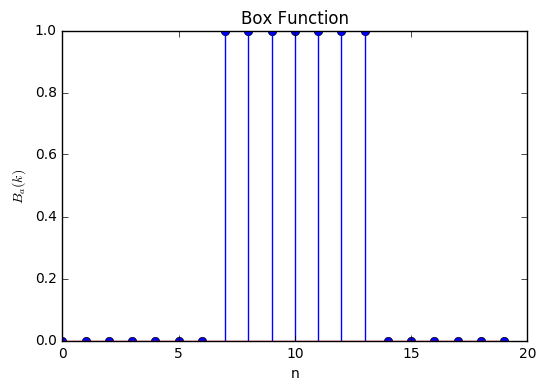

In [11]:
plt.stem(box(3,10))
plt.xlabel(r'n')
plt.ylabel(r'$B_a(k)$')
plt.title('Box Function')

#### 1.6 Discrete sine function
Write a function <tt>sin_fn</tt> to define a discrete signal of length $N$ and containing the values of $\sin(2\pi f n T_s)$. The parameters are the frequency of the wave, the number of period, and the sampling frequency.

Plot a single period signal with a frequency of 10 Hertz and a sampling frequency of 100 Hertz using the function <tt>stem</tt> and add labels and title.

In [12]:
def sin_fn(n,f,fs):
    x = np.arange(0,1.*n/f,1./fs)
    s = np.sin(2.*np.pi*f*x)
    return s

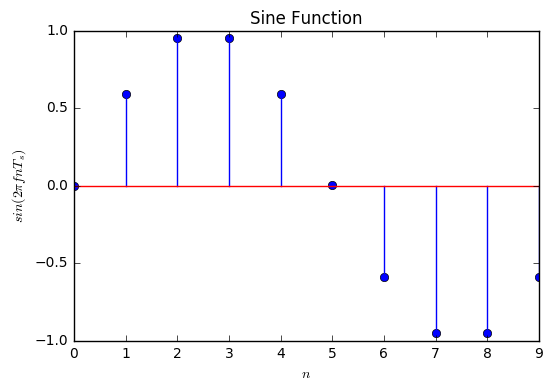

In [13]:
plt.stem(sin_fn(1,10,100))
plt.xlabel(r'$n$')
plt.ylabel(r'$sin(2\pi fnT_s)$')
plt.title('Sine Function')

Repeat the plotting for a signal with a frequency of 10 Hertz and a sampling frequency of 1000 Hertz and 2 periods. 

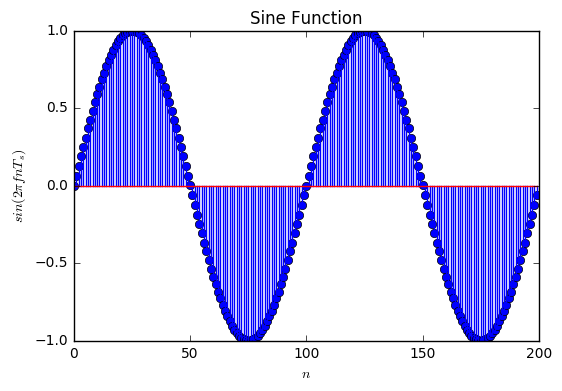

In [14]:
plt.stem(sin_fn(2,10,1000))
plt.xlabel(r'$n$')
plt.ylabel(r'$sin(2\pi fnT_s)$')
plt.title('Sine Function')

Repeat the plotting for a signal with a frequency of 10 Hertz and a sampling frequency of 30 Hertz (per period) and 2 periods. 

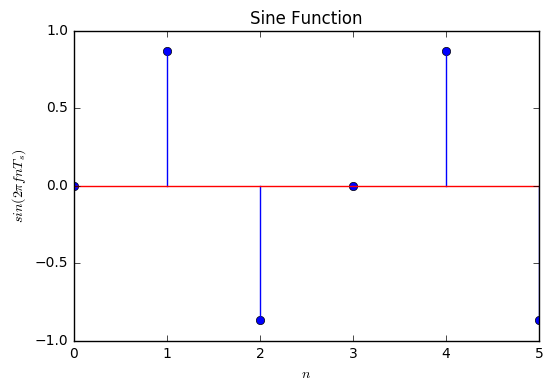

In [15]:
plt.stem(sin_fn(2,10,30))
plt.xlabel(r'$n$')
plt.ylabel(r'$sin(2\pi fnT_s)$')
plt.title('Sine Function')

What are the requirements while sampling such signal? Comments from your previous observations

#Comment : The sampling frequency must be much higher than frequency of signal

## Exercise 2

#### 2.1 Gaussian Noise
Generate an observation $x_n$ with 1000 of the normal/gaussian random process ${\cal N}$.

Plot the histogram of these data as well as the theoretical distribution.

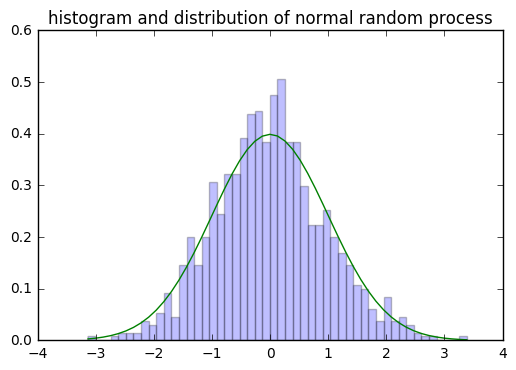

In [21]:
# Define the mean and standard deviation
mu, sigma = 0., 1.

x = np.random.normal(mu, sigma, (1000, ))

# Plot the histogram
n, bins, patches = plt.hist(x, 50, normed=1, alpha=0.25)
plt.title('histogram and distribution of normal random process')

# Plot the distribution
from scipy.stats import norm
distri = norm.pdf(bins, mu, sigma)
plt.plot(bins, distri)


Increase the number of samples to 10000 and repeat the experiment. Discuss.

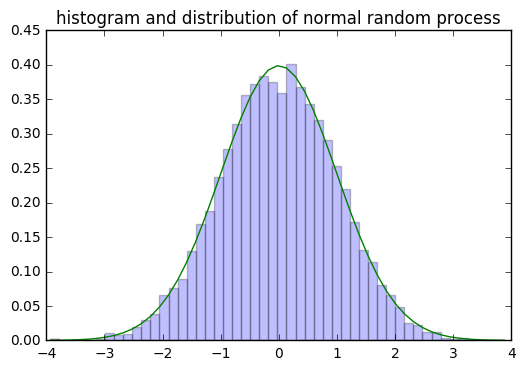

In [22]:
# Define the mean and standard deviation
mu, sigma = 0, 1

rand_nor = np.random.normal(mu, sigma, (10000, ))

# Plot the histogram

n, bins, patches = plt.hist(rand_nor, 50, normed=1, alpha=0.25)
plt.title('histogram and distribution of normal random process')

# Plot the distribution
from scipy.stats import norm
distri = norm.pdf(bins, mu, sigma)
plt.plot(bins,distri)

#COMMENT
#As the number of samples increases the distribution will more tend to 
#theoretical distribution and it would be more smooth

#### 2.2 Uniform distribution
Same question with the uniform law of the random process ${\cal U}$ and an observation $x_u$.

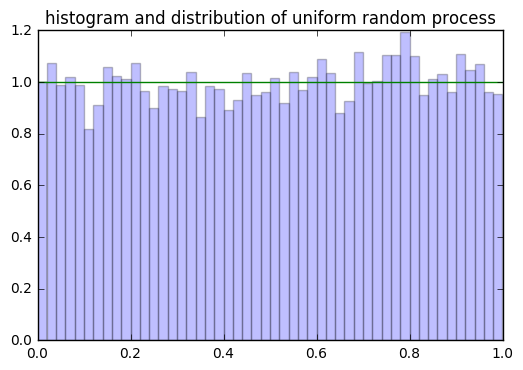

In [23]:
# Define the number of samples to draw
N = 10000

# Generate the data
rand_uni = np.random.uniform(mu,sigma,(N,))

# Plot the histogram
n, bins, patches = plt.hist(rand_uni, 50, normed=1, alpha=0.25)
plt.title('histogram and distribution of uniform random process')

# Plot the distribution
from scipy.stats import uniform
distri = uniform.pdf(bins)
plt.plot(bins,distri)

#COMMENT
#As the number of samples increases the distribution will more tend to 
#theoretical distribution and it would be more smooth

#### 2.3 Autocorrelation
Compute the autocorrelation of the two observations and plot them. Are these noises "white"? Conclusion?

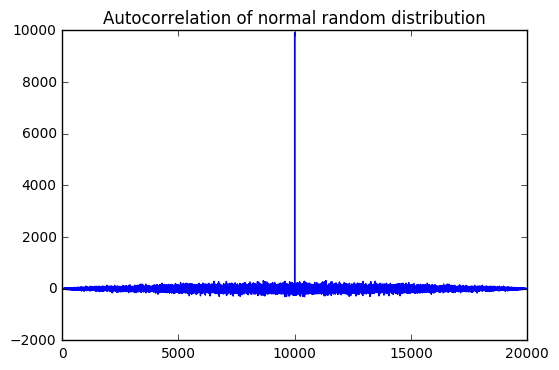

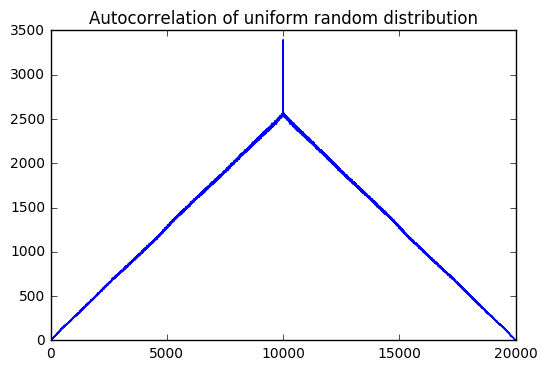

In [24]:
# Compute the autocorrelation of Gaussian observations
auto_nor = np.correlate(rand_nor,rand_nor,'full')
plt.figure()
plt.plot(auto_nor)
plt.title('Autocorrelation of normal random distribution')

# Compute the autocorrelation of uniform random observations
auto_uni = np.correlate(rand_uni,rand_uni,'full')
plt.figure()
plt.plot(auto_uni)
plt.title('Autocorrelation of uniform random distribution')

#The autocorrelation of normal distribution has almost a dirac function type 
#from the properties of white noise , we can say that the noise which has autocorrelation as a dirac is "white noise"

Generate three binary random signals $s_1, s_2, s_3$ thanks to the instruction <tt>np.round(np.random.uniform(0, 1, 50))</tt>. Generate a whole signal $s$ containing these signals at different shifts. Compute the cross-correlation between the whole signals and $s_1, s_2, s_3$. Comment the results.

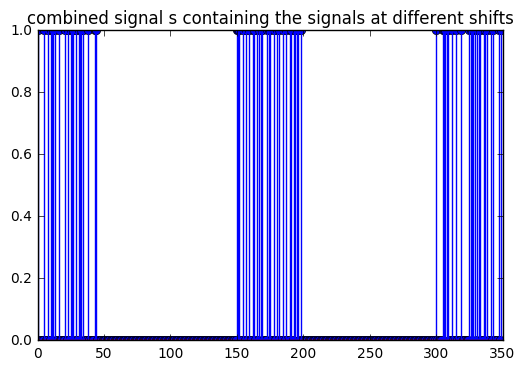

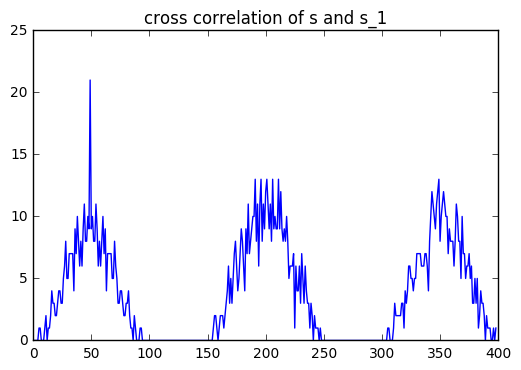

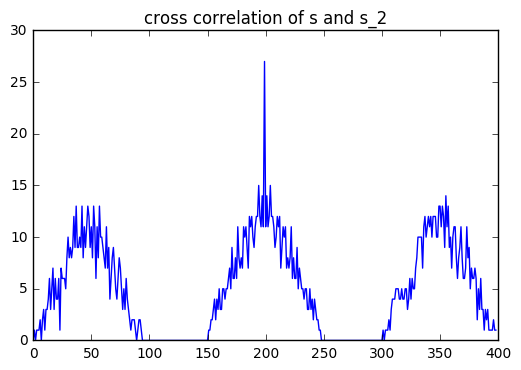

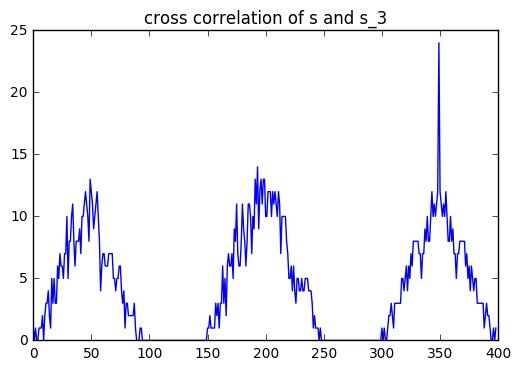

In [26]:
#generate three random signals
s_1 = np.round(np.random.uniform(0, 1, 50))
s_2 = np.round(np.random.uniform(0, 1, 50))
s_3 = np.round(np.random.uniform(0, 1, 50))

#combined signal s containing the signals at different shifts
s = np.zeros(350)
s[0:50] = s_1
s[150:200] = s_2
s[300:350] = s_3

plt.stem(s)
plt.title('combined signal s containing the signals at different shifts')

#crosscorrelation of s and s_1
cros_s_s1 = np.correlate(s,s_1,'full')
plt.figure()
plt.plot(cros_s_s1)
plt.title('cross correlation of s and s_1')
#This creates the autocorelation for s_1 in the interval 0 to 100

#crosscorrelation of s and s_2
cros_s_s2 = np.correlate(s,s_2,'full')
plt.figure()
plt.plot(cros_s_s2)
plt.title('cross correlation of s and s_2')
#This creates the autocorelation for s_2 in the interval 150 to 250

#crosscorrelation of s and s_2
cros_s_s3 = np.correlate(s,s_3,'full')
plt.figure()
plt.plot(cros_s_s3)
plt.title('cross correlation of s and s_3')
#This creates the autocorelation for s_ in the interval 300 to 400